## Zadanie - losowanie 1000 losowych punktów + klastrowanie

In [19]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from io import StringIO
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.vq import whiten

In [11]:
def generate_random_elements_v1(amount, x_max, y_max):
    x = []
    y = []
    
    for i in range(amount):
        x.append(np.random.randint(0,high=x_max))
        y.append(np.random.randint(0,high=y_max))
        
    return pd.DataFrame({'x' : x, 'y': y})

In [12]:
df_rand = generate_random_elements_v1(1000, 100, 100)
df_rand.head()

x   y
0  50  69
1   3  88
2  49  19
3   7  59
4  17  51

## Dendrogram

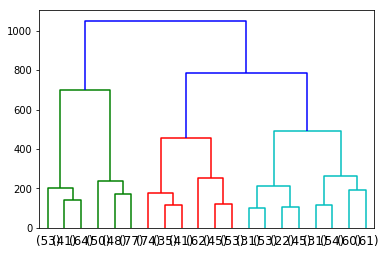

In [13]:
distance_matrix = linkage(df_rand, "ward")

dn = dendrogram(distance_matrix, p=20, truncate_mode='lastp')
plt.show()

## Kmeans

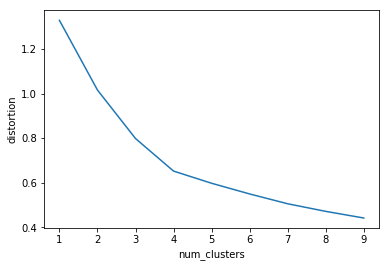

In [20]:
df_rand["scaled_x"] = whiten(df_rand["x"])
df_rand["scaled_y"] = whiten(df_rand["y"])

dist = []
num_clusters = range(1, 10)

for i in num_clusters:
    cluster_centers, distortion = kmeans(df_rand[["scaled_x","scaled_y"]], i)
    dist.append(distortion)

elbow_plot = pd.DataFrame({"num_clusters": num_clusters, "distortion": dist})
sns.lineplot(x="num_clusters", y="distortion", data=elbow_plot)

In [21]:
# funkcja v1 generuje rozklady bardzo równe, chcemy wpłynąć na rozkład danych 
# - losujemy centroidy (najpierw jeden), potem wokol tych centroidow losujemy dane (center - centroid, scope - zakres)
def generate_random_elements_v2(amount, center, scope):
    x = []
    y = []
    
    x_center, y_center = center # rozpakowanie tupli
    
    for i in range(amount):
        x.append(np.random.randint(x_center,high=scope))
        y.append(np.random.randint(y_center,high=scope))
        
    return pd.DataFrame({'x' : x, 'y': y})

In [26]:
# NIE DZIALA!!!!! ZADANIE NIEROZWIAZANE NA ZAJECIACH.
new_super_centroids_data_turbo_2000 = pd.DataFrame({'x' : [], 'y': []})

# config = [[(30, 50), 70], [(30, 50), 30], [(30, 50), 30], [(30, 50), 30]]
config = [[(30, 50), 70]]

for conf in config:
    result = generate_random_elements_v2(50, conf[0], conf[1])
    pd.concat([new_super_centroids_data_turbo_2000, result])

In [27]:
new_super_centroids_data_turbo_2000

Empty DataFrame
Columns: [x, y]
Index: []